## Применение nn модуля для инициализации loss функции и класса Sequential.

In [3]:
import torch
import torch.optim as optim

dtype = torch.float
device = torch.device('cuda:0')
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)

loss_fn = torch.nn.MSELoss(reduction='sum')
lr = 1e-4
epochs = 500


for epoch in range(epochs):
    # nn Module содержит __call__ изменения, что означает, что его можно вызывать как функцию.
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    print(epoch, loss)
    
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= param.grad * lr
    
    
    

0 tensor(673.0919, grad_fn=<MseLossBackward>)
1 tensor(625.3113, grad_fn=<MseLossBackward>)
2 tensor(583.3788, grad_fn=<MseLossBackward>)
3 tensor(546.1265, grad_fn=<MseLossBackward>)
4 tensor(512.3602, grad_fn=<MseLossBackward>)
5 tensor(481.5365, grad_fn=<MseLossBackward>)
6 tensor(453.2638, grad_fn=<MseLossBackward>)
7 tensor(427.5101, grad_fn=<MseLossBackward>)
8 tensor(403.5431, grad_fn=<MseLossBackward>)
9 tensor(381.1493, grad_fn=<MseLossBackward>)
10 tensor(360.0009, grad_fn=<MseLossBackward>)
11 tensor(340.1133, grad_fn=<MseLossBackward>)
12 tensor(321.3345, grad_fn=<MseLossBackward>)
13 tensor(303.5574, grad_fn=<MseLossBackward>)
14 tensor(286.7080, grad_fn=<MseLossBackward>)
15 tensor(270.6896, grad_fn=<MseLossBackward>)
16 tensor(255.4722, grad_fn=<MseLossBackward>)
17 tensor(241.0190, grad_fn=<MseLossBackward>)
18 tensor(227.3003, grad_fn=<MseLossBackward>)
19 tensor(214.2599, grad_fn=<MseLossBackward>)
20 tensor(201.8699, grad_fn=<MseLossBackward>)
21 tensor(190.1388, gra

178 tensor(0.0967, grad_fn=<MseLossBackward>)
179 tensor(0.0932, grad_fn=<MseLossBackward>)
180 tensor(0.0898, grad_fn=<MseLossBackward>)
181 tensor(0.0865, grad_fn=<MseLossBackward>)
182 tensor(0.0834, grad_fn=<MseLossBackward>)
183 tensor(0.0804, grad_fn=<MseLossBackward>)
184 tensor(0.0775, grad_fn=<MseLossBackward>)
185 tensor(0.0747, grad_fn=<MseLossBackward>)
186 tensor(0.0720, grad_fn=<MseLossBackward>)
187 tensor(0.0694, grad_fn=<MseLossBackward>)
188 tensor(0.0669, grad_fn=<MseLossBackward>)
189 tensor(0.0645, grad_fn=<MseLossBackward>)
190 tensor(0.0622, grad_fn=<MseLossBackward>)
191 tensor(0.0600, grad_fn=<MseLossBackward>)
192 tensor(0.0578, grad_fn=<MseLossBackward>)
193 tensor(0.0558, grad_fn=<MseLossBackward>)
194 tensor(0.0538, grad_fn=<MseLossBackward>)
195 tensor(0.0519, grad_fn=<MseLossBackward>)
196 tensor(0.0500, grad_fn=<MseLossBackward>)
197 tensor(0.0483, grad_fn=<MseLossBackward>)
198 tensor(0.0466, grad_fn=<MseLossBackward>)
199 tensor(0.0449, grad_fn=<MseLos

356 tensor(0.0002, grad_fn=<MseLossBackward>)
357 tensor(0.0002, grad_fn=<MseLossBackward>)
358 tensor(0.0002, grad_fn=<MseLossBackward>)
359 tensor(0.0002, grad_fn=<MseLossBackward>)
360 tensor(0.0002, grad_fn=<MseLossBackward>)
361 tensor(0.0002, grad_fn=<MseLossBackward>)
362 tensor(0.0002, grad_fn=<MseLossBackward>)
363 tensor(0.0002, grad_fn=<MseLossBackward>)
364 tensor(0.0002, grad_fn=<MseLossBackward>)
365 tensor(0.0002, grad_fn=<MseLossBackward>)
366 tensor(0.0002, grad_fn=<MseLossBackward>)
367 tensor(0.0002, grad_fn=<MseLossBackward>)
368 tensor(0.0002, grad_fn=<MseLossBackward>)
369 tensor(0.0002, grad_fn=<MseLossBackward>)
370 tensor(0.0002, grad_fn=<MseLossBackward>)
371 tensor(0.0001, grad_fn=<MseLossBackward>)
372 tensor(0.0001, grad_fn=<MseLossBackward>)
373 tensor(0.0001, grad_fn=<MseLossBackward>)
374 tensor(0.0001, grad_fn=<MseLossBackward>)
375 tensor(0.0001, grad_fn=<MseLossBackward>)
376 tensor(0.0001, grad_fn=<MseLossBackward>)
377 tensor(0.0001, grad_fn=<MseLos

## Применение nn модуля для написания полной сетки


In [8]:
dtype = torch.float
device = torch.device('cuda:0')
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)

optimizer = optim.SGD(model.parameters(), lr=1e-3)

# reduction='sum' необходим чтобы лосс считался по формуле (y_pred - y)^2.sum()
criterion = torch.nn.MSELoss(reduction='sum')

epochs = 500
for epoch in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    print(epoch, loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

0 tensor(687.6353, grad_fn=<MseLossBackward>)
1 tensor(351.6492, grad_fn=<MseLossBackward>)
2 tensor(214.4524, grad_fn=<MseLossBackward>)
3 tensor(121.6622, grad_fn=<MseLossBackward>)
4 tensor(64.8660, grad_fn=<MseLossBackward>)
5 tensor(34.0699, grad_fn=<MseLossBackward>)
6 tensor(18.6187, grad_fn=<MseLossBackward>)
7 tensor(11.0256, grad_fn=<MseLossBackward>)
8 tensor(7.7146, grad_fn=<MseLossBackward>)
9 tensor(8.0028, grad_fn=<MseLossBackward>)
10 tensor(14.2243, grad_fn=<MseLossBackward>)
11 tensor(34.2710, grad_fn=<MseLossBackward>)
12 tensor(86.9698, grad_fn=<MseLossBackward>)
13 tensor(187.9311, grad_fn=<MseLossBackward>)
14 tensor(272.8677, grad_fn=<MseLossBackward>)
15 tensor(170.0064, grad_fn=<MseLossBackward>)
16 tensor(42.2103, grad_fn=<MseLossBackward>)
17 tensor(10.1888, grad_fn=<MseLossBackward>)
18 tensor(3.6924, grad_fn=<MseLossBackward>)
19 tensor(1.7289, grad_fn=<MseLossBackward>)
20 tensor(0.9517, grad_fn=<MseLossBackward>)
21 tensor(0.5743, grad_fn=<MseLossBackward

170 tensor(5.7417e-11, grad_fn=<MseLossBackward>)
171 tensor(5.3380e-11, grad_fn=<MseLossBackward>)
172 tensor(4.9281e-11, grad_fn=<MseLossBackward>)
173 tensor(4.6193e-11, grad_fn=<MseLossBackward>)
174 tensor(4.3835e-11, grad_fn=<MseLossBackward>)
175 tensor(4.0217e-11, grad_fn=<MseLossBackward>)
176 tensor(3.7468e-11, grad_fn=<MseLossBackward>)
177 tensor(3.5768e-11, grad_fn=<MseLossBackward>)
178 tensor(3.3518e-11, grad_fn=<MseLossBackward>)
179 tensor(3.1868e-11, grad_fn=<MseLossBackward>)
180 tensor(2.9809e-11, grad_fn=<MseLossBackward>)
181 tensor(2.7425e-11, grad_fn=<MseLossBackward>)
182 tensor(2.6447e-11, grad_fn=<MseLossBackward>)
183 tensor(2.4837e-11, grad_fn=<MseLossBackward>)
184 tensor(2.4226e-11, grad_fn=<MseLossBackward>)
185 tensor(2.3314e-11, grad_fn=<MseLossBackward>)
186 tensor(2.1965e-11, grad_fn=<MseLossBackward>)
187 tensor(2.1103e-11, grad_fn=<MseLossBackward>)
188 tensor(2.0062e-11, grad_fn=<MseLossBackward>)
189 tensor(1.9096e-11, grad_fn=<MseLossBackward>)


333 tensor(2.1168e-12, grad_fn=<MseLossBackward>)
334 tensor(2.0101e-12, grad_fn=<MseLossBackward>)
335 tensor(2.2576e-12, grad_fn=<MseLossBackward>)
336 tensor(1.9770e-12, grad_fn=<MseLossBackward>)
337 tensor(2.0550e-12, grad_fn=<MseLossBackward>)
338 tensor(1.9279e-12, grad_fn=<MseLossBackward>)
339 tensor(1.9134e-12, grad_fn=<MseLossBackward>)
340 tensor(1.6333e-12, grad_fn=<MseLossBackward>)
341 tensor(1.4908e-12, grad_fn=<MseLossBackward>)
342 tensor(1.4354e-12, grad_fn=<MseLossBackward>)
343 tensor(1.4630e-12, grad_fn=<MseLossBackward>)
344 tensor(1.6867e-12, grad_fn=<MseLossBackward>)
345 tensor(1.5810e-12, grad_fn=<MseLossBackward>)
346 tensor(1.5127e-12, grad_fn=<MseLossBackward>)
347 tensor(1.7551e-12, grad_fn=<MseLossBackward>)
348 tensor(1.9504e-12, grad_fn=<MseLossBackward>)
349 tensor(2.1702e-12, grad_fn=<MseLossBackward>)
350 tensor(1.9409e-12, grad_fn=<MseLossBackward>)
351 tensor(2.0146e-12, grad_fn=<MseLossBackward>)
352 tensor(1.8488e-12, grad_fn=<MseLossBackward>)


496 tensor(1.4184e-12, grad_fn=<MseLossBackward>)
497 tensor(1.4811e-12, grad_fn=<MseLossBackward>)
498 tensor(1.3617e-12, grad_fn=<MseLossBackward>)
499 tensor(1.1282e-12, grad_fn=<MseLossBackward>)


## Кастомные nn модули

In [12]:
import torch

class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)
    
    def forward(self, x):
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred
        
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = TwoLayerNet(D_in, H, D_out)
optimizer = optim.SGD(model.parameters(), lr=1e-3)
criterion = torch.nn.MSELoss(reduction='sum')
epochs = 500
for epoch in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    print(epoch, loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

0 tensor(659.4853, grad_fn=<MseLossBackward>)
1 tensor(338.6412, grad_fn=<MseLossBackward>)
2 tensor(202.0045, grad_fn=<MseLossBackward>)
3 tensor(112.1848, grad_fn=<MseLossBackward>)
4 tensor(58.7346, grad_fn=<MseLossBackward>)
5 tensor(30.3047, grad_fn=<MseLossBackward>)
6 tensor(15.8082, grad_fn=<MseLossBackward>)
7 tensor(8.6997, grad_fn=<MseLossBackward>)
8 tensor(5.2891, grad_fn=<MseLossBackward>)
9 tensor(4.1188, grad_fn=<MseLossBackward>)
10 tensor(5.2137, grad_fn=<MseLossBackward>)
11 tensor(10.4512, grad_fn=<MseLossBackward>)
12 tensor(25.6203, grad_fn=<MseLossBackward>)
13 tensor(62.7931, grad_fn=<MseLossBackward>)
14 tensor(137.8798, grad_fn=<MseLossBackward>)
15 tensor(214.8307, grad_fn=<MseLossBackward>)
16 tensor(195.5551, grad_fn=<MseLossBackward>)
17 tensor(69.1192, grad_fn=<MseLossBackward>)
18 tensor(16.6829, grad_fn=<MseLossBackward>)
19 tensor(4.9707, grad_fn=<MseLossBackward>)
20 tensor(2.0677, grad_fn=<MseLossBackward>)
21 tensor(1.0581, grad_fn=<MseLossBackward>

169 tensor(1.9839e-12, grad_fn=<MseLossBackward>)
170 tensor(2.2193e-12, grad_fn=<MseLossBackward>)
171 tensor(2.0730e-12, grad_fn=<MseLossBackward>)
172 tensor(2.2307e-12, grad_fn=<MseLossBackward>)
173 tensor(2.1926e-12, grad_fn=<MseLossBackward>)
174 tensor(2.2334e-12, grad_fn=<MseLossBackward>)
175 tensor(2.2606e-12, grad_fn=<MseLossBackward>)
176 tensor(1.8617e-12, grad_fn=<MseLossBackward>)
177 tensor(1.7015e-12, grad_fn=<MseLossBackward>)
178 tensor(1.8351e-12, grad_fn=<MseLossBackward>)
179 tensor(1.6269e-12, grad_fn=<MseLossBackward>)
180 tensor(1.4837e-12, grad_fn=<MseLossBackward>)
181 tensor(1.6907e-12, grad_fn=<MseLossBackward>)
182 tensor(1.9659e-12, grad_fn=<MseLossBackward>)
183 tensor(1.8749e-12, grad_fn=<MseLossBackward>)
184 tensor(1.8344e-12, grad_fn=<MseLossBackward>)
185 tensor(1.7356e-12, grad_fn=<MseLossBackward>)
186 tensor(1.7977e-12, grad_fn=<MseLossBackward>)
187 tensor(1.8811e-12, grad_fn=<MseLossBackward>)
188 tensor(1.8356e-12, grad_fn=<MseLossBackward>)


332 tensor(1.3493e-12, grad_fn=<MseLossBackward>)
333 tensor(1.3233e-12, grad_fn=<MseLossBackward>)
334 tensor(1.2289e-12, grad_fn=<MseLossBackward>)
335 tensor(1.0623e-12, grad_fn=<MseLossBackward>)
336 tensor(1.2795e-12, grad_fn=<MseLossBackward>)
337 tensor(1.2147e-12, grad_fn=<MseLossBackward>)
338 tensor(1.1896e-12, grad_fn=<MseLossBackward>)
339 tensor(1.1993e-12, grad_fn=<MseLossBackward>)
340 tensor(1.2608e-12, grad_fn=<MseLossBackward>)
341 tensor(1.3962e-12, grad_fn=<MseLossBackward>)
342 tensor(1.2797e-12, grad_fn=<MseLossBackward>)
343 tensor(1.2446e-12, grad_fn=<MseLossBackward>)
344 tensor(1.2596e-12, grad_fn=<MseLossBackward>)
345 tensor(1.3792e-12, grad_fn=<MseLossBackward>)
346 tensor(1.2178e-12, grad_fn=<MseLossBackward>)
347 tensor(1.1240e-12, grad_fn=<MseLossBackward>)
348 tensor(1.0596e-12, grad_fn=<MseLossBackward>)
349 tensor(9.4501e-13, grad_fn=<MseLossBackward>)
350 tensor(1.1459e-12, grad_fn=<MseLossBackward>)
351 tensor(1.0781e-12, grad_fn=<MseLossBackward>)


495 tensor(1.4020e-12, grad_fn=<MseLossBackward>)
496 tensor(1.3852e-12, grad_fn=<MseLossBackward>)
497 tensor(1.5007e-12, grad_fn=<MseLossBackward>)
498 tensor(1.3850e-12, grad_fn=<MseLossBackward>)
499 tensor(1.4164e-12, grad_fn=<MseLossBackward>)


## Динамическая нейронная сеть

Попробуем построить нейронную сеть, которая на каждом forward pass'e случайным образом выбирала бы число между 1 и 4, что означает, что на каждой тренировочной итерации обучаются разные архитектуры.

In [39]:
import random
import torch

class DynamicNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(DynamicNet, self).__init__()
        self.input_linear = torch.nn.Linear(D_in, H)
        self.middle_linear = torch.nn.Linear(H, H)
        self.output_linear = torch.nn.Linear(H, D_out)
    
    def forward(self, x):
        h_relu = self.input_linear(x).clamp(min=0)
        for _ in range(random.randint(0, 3)):
            h_relu = self.middle_linear(h_relu).clamp(min=0)
        y_pred = self.output_linear(h_relu)
        return y_pred
    
N, D_in, H, D_out = 64, 1000, 100, 10
model = DynamicNet(D_in, H, D_out)
model

    

DynamicNet(
  (input_linear): Linear(in_features=1000, out_features=100, bias=True)
  (middle_linear): Linear(in_features=100, out_features=100, bias=True)
  (output_linear): Linear(in_features=100, out_features=10, bias=True)
)

In [40]:
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5, momentum=0.9)
epochs = 500

losses = []
for epoch in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    print(epoch, loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

0 tensor(671.7748, grad_fn=<MseLossBackward>)
1 tensor(642.7378, grad_fn=<MseLossBackward>)
2 tensor(633.7808, grad_fn=<MseLossBackward>)
3 tensor(657.6374, grad_fn=<MseLossBackward>)
4 tensor(640.3538, grad_fn=<MseLossBackward>)
5 tensor(633.0955, grad_fn=<MseLossBackward>)
6 tensor(637.6642, grad_fn=<MseLossBackward>)
7 tensor(632.3846, grad_fn=<MseLossBackward>)
8 tensor(622.1699, grad_fn=<MseLossBackward>)
9 tensor(612.7363, grad_fn=<MseLossBackward>)
10 tensor(631.2988, grad_fn=<MseLossBackward>)
11 tensor(634.4617, grad_fn=<MseLossBackward>)
12 tensor(579.3835, grad_fn=<MseLossBackward>)
13 tensor(567.0193, grad_fn=<MseLossBackward>)
14 tensor(625.3014, grad_fn=<MseLossBackward>)
15 tensor(540.0334, grad_fn=<MseLossBackward>)
16 tensor(525.7617, grad_fn=<MseLossBackward>)
17 tensor(621.1994, grad_fn=<MseLossBackward>)
18 tensor(619.6395, grad_fn=<MseLossBackward>)
19 tensor(617.6434, grad_fn=<MseLossBackward>)
20 tensor(615.2408, grad_fn=<MseLossBackward>)
21 tensor(466.4742, gra

173 tensor(210.2098, grad_fn=<MseLossBackward>)
174 tensor(35.4623, grad_fn=<MseLossBackward>)
175 tensor(203.7153, grad_fn=<MseLossBackward>)
176 tensor(34.1068, grad_fn=<MseLossBackward>)
177 tensor(348.8086, grad_fn=<MseLossBackward>)
178 tensor(425.1010, grad_fn=<MseLossBackward>)
179 tensor(421.8359, grad_fn=<MseLossBackward>)
180 tensor(417.8952, grad_fn=<MseLossBackward>)
181 tensor(335.4085, grad_fn=<MseLossBackward>)
182 tensor(183.5356, grad_fn=<MseLossBackward>)
183 tensor(32.2991, grad_fn=<MseLossBackward>)
184 tensor(178.0752, grad_fn=<MseLossBackward>)
185 tensor(32.1245, grad_fn=<MseLossBackward>)
186 tensor(317.1340, grad_fn=<MseLossBackward>)
187 tensor(313.6803, grad_fn=<MseLossBackward>)
188 tensor(167.8026, grad_fn=<MseLossBackward>)
189 tensor(306.0419, grad_fn=<MseLossBackward>)
190 tensor(378.1494, grad_fn=<MseLossBackward>)
191 tensor(159.8416, grad_fn=<MseLossBackward>)
192 tensor(157.0778, grad_fn=<MseLossBackward>)
193 tensor(154.0575, grad_fn=<MseLossBackwar

345 tensor(34.7716, grad_fn=<MseLossBackward>)
346 tensor(70.0055, grad_fn=<MseLossBackward>)
347 tensor(33.2705, grad_fn=<MseLossBackward>)
348 tensor(67.3928, grad_fn=<MseLossBackward>)
349 tensor(65.7594, grad_fn=<MseLossBackward>)
350 tensor(18.7129, grad_fn=<MseLossBackward>)
351 tensor(12.8153, grad_fn=<MseLossBackward>)
352 tensor(29.8358, grad_fn=<MseLossBackward>)
353 tensor(12.9677, grad_fn=<MseLossBackward>)
354 tensor(18.5353, grad_fn=<MseLossBackward>)
355 tensor(12.7962, grad_fn=<MseLossBackward>)
356 tensor(57.2308, grad_fn=<MseLossBackward>)
357 tensor(56.2433, grad_fn=<MseLossBackward>)
358 tensor(54.9915, grad_fn=<MseLossBackward>)
359 tensor(53.5634, grad_fn=<MseLossBackward>)
360 tensor(25.8791, grad_fn=<MseLossBackward>)
361 tensor(25.2575, grad_fn=<MseLossBackward>)
362 tensor(49.3784, grad_fn=<MseLossBackward>)
363 tensor(12.8143, grad_fn=<MseLossBackward>)
364 tensor(12.8103, grad_fn=<MseLossBackward>)
365 tensor(19.5745, grad_fn=<MseLossBackward>)
366 tensor(12

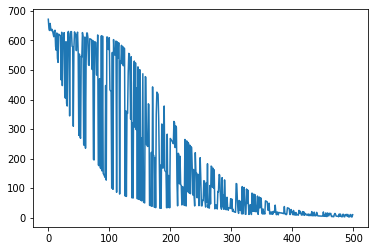

In [41]:
import matplotlib.pyplot as plt
plt.plot(losses);